In [1]:
# Daniel Bandala @ apr 2021
import cv2
import numpy as np
import matplotlib.pyplot as plt

# K-means segmentation
K-Means clustering is an unsupervised machine learning algorithm that aims to partition N observations into K clusters in which each observation belongs to the cluster with the nearest mean. A cluster refers to a collection of data points aggregated together because of certain similarities. For image segmentation, clusters here are different image colors.

In [6]:
# read the image
image = cv2.imread("dog.jpg")

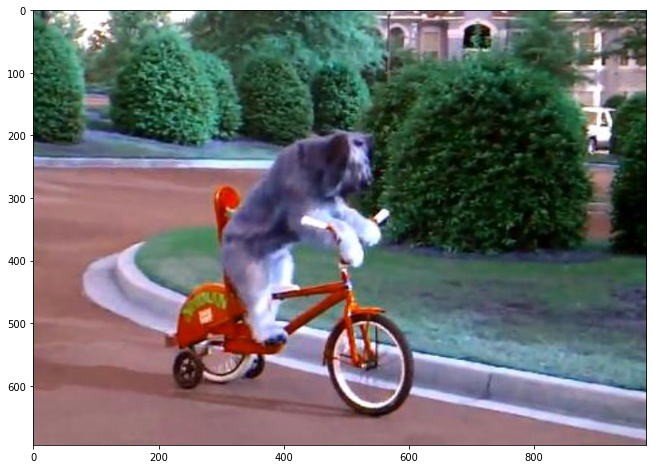

In [9]:
plt.figure(figsize=(16,8))
plt.imshow(image)

In [11]:
print(image.shape)

(695, 980, 3)


In [7]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

In [8]:
print(pixel_values.shape)

(681100, 3)


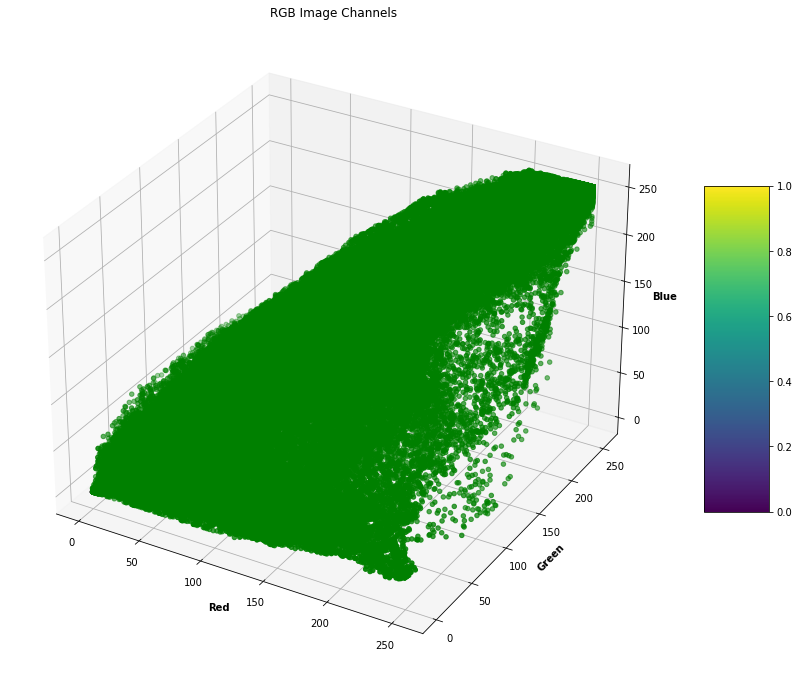

In [19]:
# plot datapoints corresponging to rgb channels
# Creating figure
fig = plt.figure(figsize = (16, 12))
ax = plt.axes(projection ="3d")

# Creating color map
#my_cmap = plt.get_cmap('hsv')
# Creating plot
sctt = ax.scatter3D(pixel_values[:,0], pixel_values[:,1], pixel_values[:,2],color='green',marker ='o')
plt.title("RGB Image Channels")
ax.set_xlabel('Red', fontweight ='bold')
ax.set_ylabel('Green', fontweight ='bold')
ax.set_zlabel('Blue', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

In [20]:
# segmentation criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [28]:
# number of clusters (K) and perform kmeans segmentation with pixel information
k = 4
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [29]:
# convert back to 8 bit values
centers = np.uint8(centers)
# flatten the labels array
labels = labels.flatten()

In [30]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

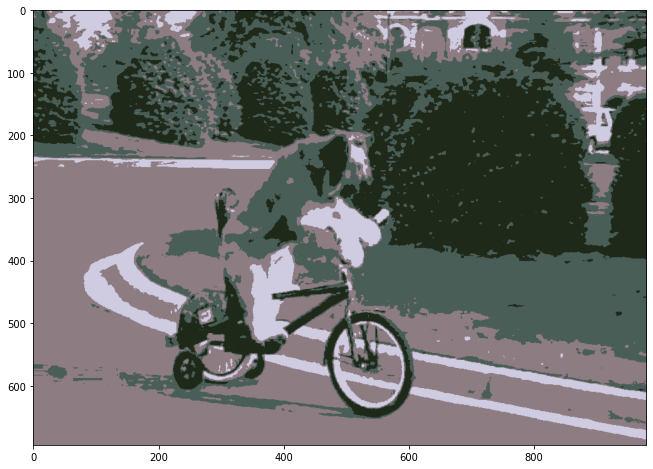

In [33]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.figure(figsize=(16,8))
plt.imshow(segmented_image)
plt.show()

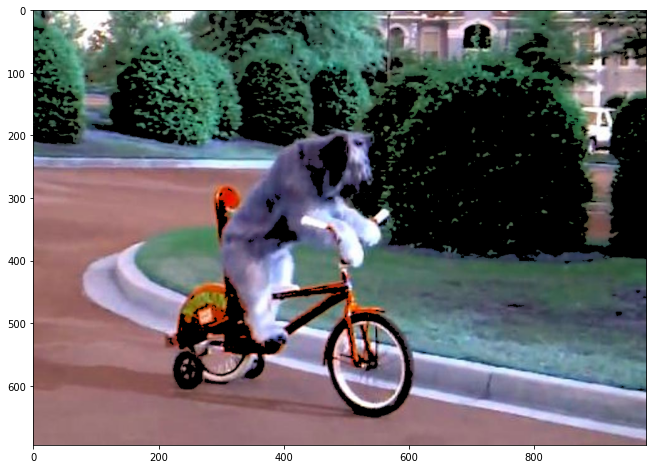

In [34]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.figure(figsize=(16,8))
plt.imshow(masked_image)
plt.show()